# Explore extinct languages

### Input
- https://www.kaggle.com/the-guardian/extinct-languages/version/1 (updated in 2016)
- original data: http://www.unesco.org/languages-atlas/index.php?hl=en&page=atlasmap (published in 2010)


### Output - TBD
- `endangered_languages_europe.csv`

## Imports

In [90]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

## Load data

In [98]:
df = pd.read_csv("../datasets/extinct_languages.csv")
print(df.shape)
df.head()

(2722, 15)


,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


In [70]:
df.columns

Index(['ID', 'Name in English', 'Name in French', 'Name in Spanish',
       'Countries', 'Country codes alpha 3', 'ISO639-3 codes',
       'Degree of endangerment', 'Alternate names', 'Name in the language',
       'Number of speakers', 'Sources', 'Latitude', 'Longitude',
       'Description of the location'],
      dtype='object')

In [76]:
ENDANGERMENT_MAP = {
    "Vulnerable": 1,
    "Definitely endangered": 2,
    "Severely endangered": 3,
    "Critically endangered": 4,
    "Extinct": 5,
}

In [77]:
df["Endangerment code"] = df["Degree of endangerment"].apply(lambda x: ENDANGERMENT_MAP[x])
df[["Degree of endangerment", "Endangerment code"]]

,Degree of endangerment,Endangerment code
0,Vulnerable,1
1,Vulnerable,1
2,Vulnerable,1
3,Vulnerable,1
4,Definitely endangered,2
...,...,...
2717,Severely endangered,3
2718,Definitely endangered,2
2719,Definitely endangered,2
2720,Definitely endangered,2


## Distribution of the degree of endangerment

<AxesSubplot:>

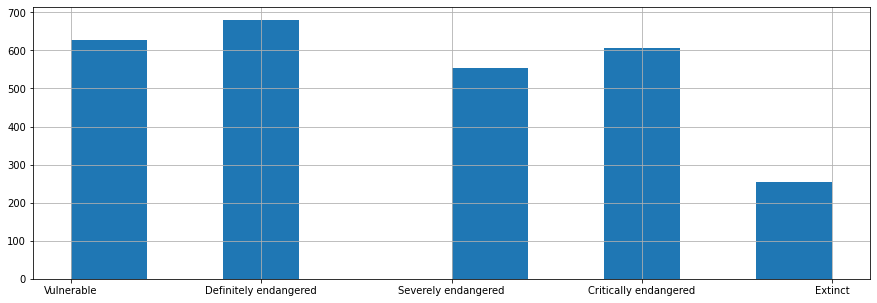

In [37]:
df["Degree of endangerment"].hist(figsize=(15,5))

## Show distribution on map

In [47]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


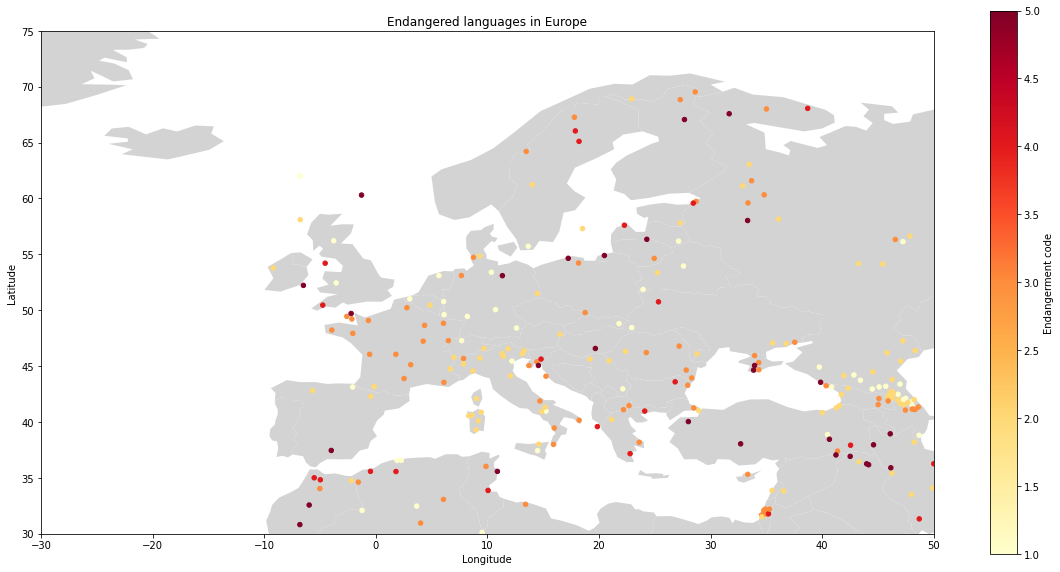

In [81]:
# Plot Europe
fig, ax = plt.subplots(figsize=(20, 10))

countries.plot(color='lightgrey', ax=ax)
plt.xlim([-30, 50])
plt.ylim([30, 75])

df.plot(
    x="Longitude", 
    y="Latitude", 
    kind="scatter", 
    title="Endangered languages in Europe", 
    c="Endangerment code", 
    colormap="YlOrRd",
    ax=ax,
)

plt.show()

## Get endangered languages only for Europe

In [84]:
europe = countries[countries["continent"] == "Europe"]
europe

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


In [94]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="lang-changes")
location = geolocator.reverse("52.509669, 13.376294", language='en')
location.raw.get('address').get("country")

'Germany'

## Todo

- What's inside Europe?
- Inside European country? --> unify country names
- Long & Lat inside Europe? --> find polygon for Europe